<a href="https://colab.research.google.com/github/jacobpad/CS_Build_Week_1/blob/master/CS_Build_Week_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

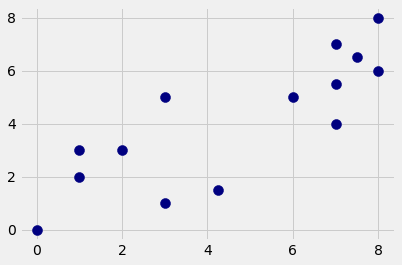

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
 
dataset = {'a':[[1,2],[3,1],[0,0],[4.25,1.5],[1,3],[2,3],[3,5]], 
           'b':[[6,5],[7,7],[7,4],[7.5,6.5],[7,5.5],[8,8],[8,6]]}
 
[[plt.scatter(ii[0], ii[1], s=100, color='navy') 
for ii in dataset[i]] for i in dataset];

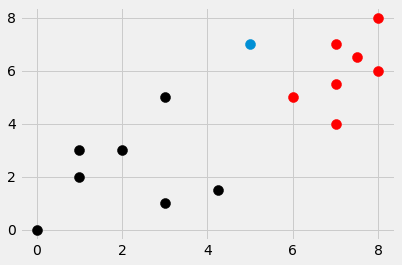

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
 
# Data it bases it's predictions on
dataset = {'k':[[1,2],[3,1],[0,0],[4.25,1.5],[1,3],[2,3],[3,5]], 'r':[[6,5],[7,7],[7,4],[7.5,6.5],[7,5.5],[8,8],[8,6]]}
 
# Introducing something new
new_features = [5,7]
 
# One line it
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset];
 
# Add the new features
plt.scatter(new_features[0], new_features[1], s=100); # Blue

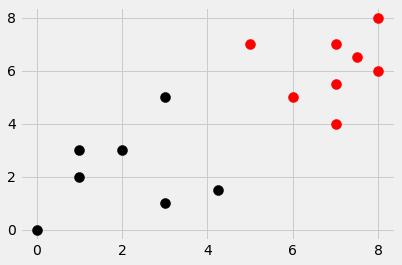

In [9]:
# One line it
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset];

# Add the new features
plt.scatter(new_features[0], new_features[1], color='red', s=100); # Blue

In [3]:
import pandas as pd
 
# The column names of the dataset
columns = [
           'id',
           'Clump Thickness',
           'Uniformity of Cell Size',
           'Uniformity of Cell Shape',
           'Marginal Adhesion',
           'Single Epithelial Cell Size',
           'Bare Nuclei',
           'Bland Chromatin',
           'Normal Nucleoli',
           'Mitoses',
           'Class'
           ]
 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
 
df = pd.read_csv(url, names=columns)
df.replace('?', -99999, inplace=True)
df.drop(['id'], axis=1, inplace=True)
 
# A function with a big long name
def replace_spaces_with_underscore_in_column_names_and_make_lowercasee(df):
  """
  Accepts a dataframe.
  Alters column names- replacing spaces with '_' and column names lowercase.
  Returns a dataframe.
  """
  labels = list(df.columns)
  for i in range(len(df.columns)):
    labels[i] = labels[i].replace(' ', '_')
    labels[i] = labels[i].lower()
  df.columns = labels
 
  return df
 
# Invokes the function
df = replace_spaces_with_underscore_in_column_names_and_make_lowercasee(df)
 
# Shows a dataframe
print(df)

     clump_thickness  uniformity_of_cell_size  ...  mitoses  class
0                  5                        1  ...        1      2
1                  5                        4  ...        1      2
2                  3                        1  ...        1      2
3                  6                        8  ...        1      2
4                  4                        1  ...        1      2
..               ...                      ...  ...      ...    ...
694                3                        1  ...        1      2
695                2                        1  ...        1      2
696                5                       10  ...        2      4
697                4                        8  ...        1      4
698                4                        8  ...        1      4

[699 rows x 10 columns]


In [4]:
# What the model uses to study on
features = df[['clump_thickness', 
               'uniformity_of_cell_size',
               'uniformity_of_cell_shape', 
               'marginal_adhesion',
               'single_epithelial_cell_size',
               'bare_nuclei', 
               'bland_chromatin',
               'normal_nucleoli',
               'mitoses']].astype(int).values.tolist()
 
# What the model tries to guess
target = df['class'].astype(int).values.tolist()
 
# Another import
from sklearn.model_selection import train_test_split
 
# Preform the split of the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [5]:
# Another import
from sklearn.preprocessing import StandardScaler
 
# Standardize the X stuff
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Even more imports
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
 
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
s_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, s_pred)
print(f'The sklearn accuracy: {acc_score}')

The sklearn accuracy: 0.9714285714285714


In [7]:
import numpy as np
 
class KNN:
    X_train = None
    y_train = None
    def __init__(self, K):
        self.K = K
 
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
 
    def euclidean_distance(self, row1, row2):
        return np.linalg.norm(row1-row2)
 
    def predict(self, pred):
 
        # Empty list
        predictions = []
 
        # Go through each row
        for p in pred:
 
            # Empty list
            distances = []
 
            # Every row in the training set
            for i, v in enumerate(self.X_train):
 
                # Get euclidean distance
                distance = self.euclidean_distance(v, p)
 
                # Append distance to list
                distances.append([distance, i])
 
            # Sort smallest to biggest
            sorted_distances = sorted(distances)
 
            # Slice getting K distances
            k_distances = sorted_distances[:self.K]
 
            # Predicted what it will be
            predict = [self.y_train[i[1]] for i in k_distances]
 
            # Tally the votes
            result = max(set(predict), key = predict.count)
 
            # Append result to the predictions list
            predictions.append(result)
 
        # return the prediction
        return predictions

In [8]:
model = KNN(K=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
my_acc_score = accuracy_score(y_test, y_pred)
 
print(f'My Class Accuracy: {my_acc_score}')

My Class Accuracy: 0.9714285714285714
